# Metrics for 3D Object Detection
**Analytic Implementations of IoU and Volume-to-Volume Distance for 3D Bounding Boxes with full degree of freedom**

Ecexute every code pane by hitting `shift + enter`

1. **Import libraries:**

In [ ]:
%matplotlib widget
import os
os.chdir('/home/3D-Metrics/src/')

import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d
from scipy.spatial.transform import Rotation as R

2. **Import implementation of the metrics:**

In [2]:
from open3d_addon import * # look here if you're interested in the code

3. **Test the implementation:**
    - change Bounding Box (BB) Parameters
        - center ≙ position der BB
        - r ≙ rotation matrix (here constructed from euler angles in degree)
        - extent ≙ size of the BB
    - select metric to be computed (by commenting out every other metric - daefault is box_disparity)
    - execute code block by hitting `shift + enter`
    - inspect plot (with the mouse rotation is possible)

[Open3D WARNING] invalid color in PaintUniformColor, clipping to [0, 1]
[Open3D WARNING] invalid color in PaintUniformColor, clipping to [0, 1]
[Open3D WARNING] invalid color in PaintUniformColor, clipping to [0, 1]
[Open3D WARNING] invalid color in PaintUniformColor, clipping to [0, 1]
2.613454362090199


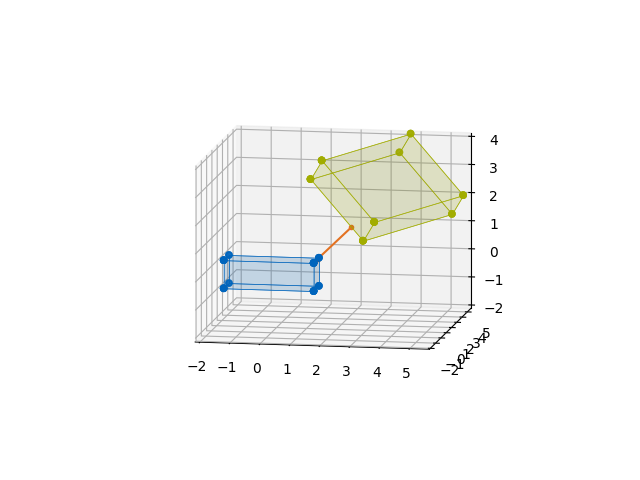

In [3]:
# Bounding Box 1 (simply edit the values)
r = R.from_euler('xyz', [0,0,0], degrees=True).as_matrix() # euler angles
bb = OrientedBoundingBox(center=[0,0,0], R=r, extent=[3,1,1])

# Bounding Box 2 (simply edit the values)
r = R.from_euler('xyz', [10,-50,-45], degrees=True).as_matrix()
bb2 = OrientedBoundingBox(center=[3.5,2,2.8], R=r, extent=[1,4,3])

# init vizualisation
plt.close('all') # close previous plots
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', proj_type = 'ortho', elev=10, azim=-80)

# select metric by (un-)commenting - only iou_v and v2v have visualization of the result
#res = bb.IoU_v(bb2, ax=ax)
#res = bb.v2v(bb2, ax=ax)
res = bb.bbd(bb2,ax=ax)

print(res) # print result

# vizualisation
ax.set_autoscale_on(False)
ax.set_xlim(-2,5.5) 
ax.set_ylim(-2,5.5)
ax.set_zlim(-2,4)
#fig.add_subplot(ax)
plt.show()

---
using stand alone function

In [4]:
%matplotlib widget
import os
os.chdir('/home/3D-Metrics/src/')

import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.transform import Rotation as R
from standalone  import * # look here if you're interested in the code

0.8844501257483274


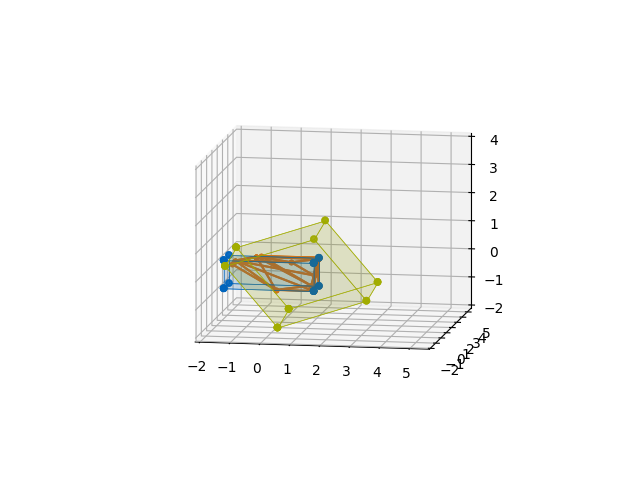

In [5]:
# Bounding Box 1 (simply edit the values)
p = np.array([0,0,0]) # position of center
r = R.from_euler('xyz', [0,0,0], degrees=True).as_matrix() # euler angles
d = np.array([3,1,1]) # size
T = np.vstack([np.column_stack([d*r,p]),[0,0,0,1]])
bb = OBB(T)

# Bounding Box 2 (simply edit the values)
#p = np.array([3.5,2,2.8])
p = np.array([1,0,0])
r = R.from_euler('xyz', [10,-50,-45], degrees=True).as_matrix()
d = np.array([1,4,3])
T = np.vstack([np.column_stack([d*r,p]),[0,0,0,1]])
bb2 = OBB(T)

# init vizualisation
plt.close('all') # close previous plots
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', proj_type = 'ortho', elev=10, azim=-80)

# select metric by (un-)commenting
#res = bb.IoU_v(bb2,1e-8, ax=ax)
#res = bb.v2v(bb2, ax=ax)
res = bb.bbd(bb2,ax=ax)
print(res)

# vizualisation
ax.set_autoscale_on(False)
ax.set_xlim(-2,5.5) 
ax.set_ylim(-2,5.5)
ax.set_zlim(-2,4)
#fig.add_subplot(ax)
plt.show()

---
## Questions for implementation on the internet:
- [1](https://stackoverflow.com/questions/41874851/numerically-calculate-intersecting-volume-of-two-cuboids)
- [2](https://math.stackexchange.com/questions/4074828/calculate-volume-of-intersection-two-non-aligned-cuboids)
- [3](https://www.mathworks.com/matlabcentral/answers/489472-get-the-volume-of-intersection-between-two-3d-shapes)
- [4](https://users.rust-lang.org/t/calculating-intersection-of-two-3d-rectangles/63074/14)
- [5 - v2v](https://forums.tigsource.com/index.php?topic=24425.0)

---
## Visualization of a single bounding box:

[[ 2.12132034 -0.70710678  0.          2.        ]
 [ 2.12132034  0.70710678  0.          0.        ]
 [ 0.          0.          2.          1.        ]
 [ 0.          0.          0.          1.        ]]


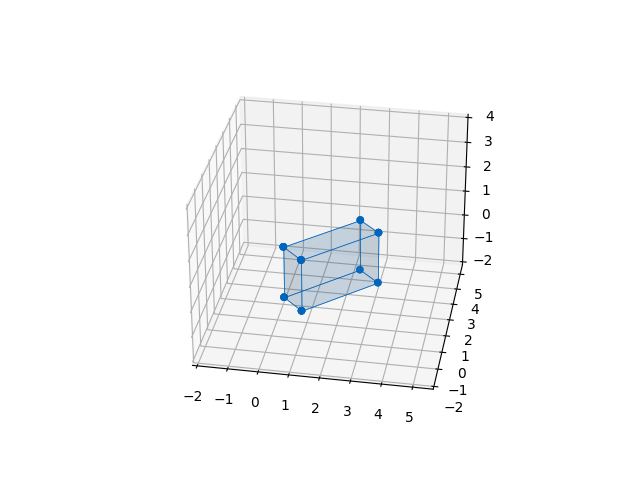

In [6]:
T = np.eye(4)
T[:3,3] = [2,0,1]
T[:3,:3] = R.from_euler('z', [0],degrees=True).as_matrix()@R.from_euler('z', [45],degrees=True).as_matrix()*np.array([3,1,2])
print(T)
plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', elev=30, azim=-80)
plot_bb(T,default_colors[2]/255, ax=ax)
ax.set_xlim(-2,5.5) 
ax.set_ylim(-2,5.5)
ax.set_zlim(-2,4)
plt.show()
#plt.savefig("test.pdf", transparent=True)

---
## Point-based vs Volume-based IoU

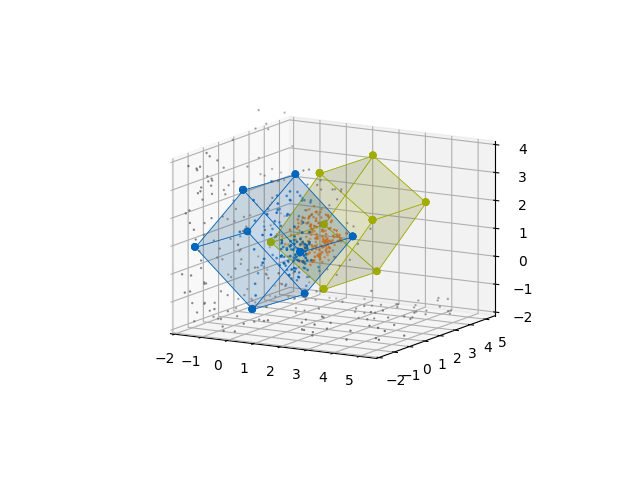

In [8]:
# Bounding Box 1 (GT)(simply edit the values)
r = R.from_euler('xyz', [0,40,-5], degrees=True).as_matrix() # euler angles
bb = OrientedBoundingBox(center=[0.4,0.2,1], R=r, extent=[3,3,3])

# Bounding Box 2 (Detection result)(simply edit the values)
r2 = R.from_euler('xyz', [0,35,-2], degrees=True).as_matrix()
bb2 = OrientedBoundingBox(center=[2.3,1.8,1.6], R=r2, extent=[2.5,3.3,3.3])

## generate random point cloud based on first BB
np.random.seed(1)
points = np.stack(
   [-np.clip(abs(np.random.normal(0, 0.41, 300)),0,1) for i in range(4)]
) + np.array([[0.5,0.5,0.5,0]]).T
points[3,:] = 1
points = bb.getT() @ points

# generate wall and ground
points = np.hstack([points[:3],points[:3,::3]+np.array([[0,2,0]]).T])
points = np.hstack([points[:3],np.stack( [
    np.random.uniform(-2, 5, 100),
    np.random.uniform(-2, 5, 100),
    np.clip(abs(np.random.normal(0, 0.1, 100)),0,1)*4-2,
])])

points = np.hstack([points[:3],np.stack( [
    np.clip(abs(np.random.normal(0, 0.05, 100)),0,1)*4-2,
    np.random.uniform(-2, 5, 100),
    np.random.uniform(-2, 5, 100),
])])
p = o3d.utility.Vector3dVector(points[:3,:].T)

i1 = np.zeros([600,1],'bool')[:,0]
i1[bb2.get_point_indices_within_bounding_box(p)]=True
i2 = np.zeros([600,1],'bool')[:,0]
i2[bb.get_point_indices_within_bounding_box(p)]=True

# init vizualisation
plt.close('all') # close previous plots
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d',proj_type = 'ortho', elev=12, azim=-60)

# plot boxes and points
plot_bb(bb.getT(),default_colors[2]/255, ax=ax)
plot_bb(bb2.getT(),default_colors[8]/255, ax=ax)
ax.scatter(points[0,i1&i2],points[1,i1&i2],points[2,i1&i2],color=default_colors[7]/255,s=1)
ax.scatter(points[0,~i1&i2],points[1,~i1&i2],points[2,~i1&i2],color=default_colors[2]/255,s=1)
ax.scatter(points[0,(~i1&~i2)],points[1,(~i1&~i2)],points[2,(~i1&~i2)],color=[0.4,0.4,0.4],s=0.5)

# visualization
ax.set_autoscale_on(False)
ax.set_xlim(-2,5.5) 
ax.set_ylim(-2,5.5)
ax.set_zlim(-2,4)
plt.show()
#plt.savefig("IoU_p_vs_v.png", transparent=True)

In [9]:
# calculate IoU
res = bb.IoU_v(bb2,1e-8)
pc = o3d.geometry.PointCloud()
pc.points = p
res2 = bb.IoU_p(bb2,pc)
print(res2,' vs. ',res)

0.4672364672364672  vs.  0.07468666705855186


---
## Code for testing blender (do not execute if bpy is not configured):

In [ ]:
import bpy, bmesh, numpy
bpy.ops.mesh.primitive_cube_add(location=(0,0,0),rotation=(0,0,0), scale=(1, 1, 1))
cube = bpy.data.objects[2]
V_1 = cube.calc_volume()
bpy.ops.mesh.primitive_cube_add(location=(0,0,0),rotation=(45,0,0), scale=(1, 1, 1))
cube2 = bpy.data.objects[3]
V_2 = cube2.calc_volume()

bool_one = cube.modifiers.new(type="BOOLEAN", name="bool 1")
bool_one.object = cube2
bool_one.operation = 'INTERSECT'
bool_one.solver = 'EXACT'
bpy.context.view_layer.objects.active = cube
bpy.ops.object.modifier_apply(modifier = 'bool 1')
poi = numpy.array([[v.co.x,v.co.y,v.co.z] for v in cube.data.vertices])

bm = bmesh.new()
bm.from_mesh(cube.to_mesh())
V_I = bm.calc_volume(signed=True)
IoU_v = V_I/(V1+V2-V_I)
print(IoU_v)